### Topic: K-Means Clustering - Applications (Image Segmentation)
- Theory and Algo
- Mathematical Background
- Image Segmentation - What is it?
- Image Segmentation - Why do we need it?
- Perform Image Segmentation using K-Means Clustering (Look at Lloyd and Elken Algorithm)
- Explore different values of K
- Metrics used to find the perfect value of K (Variance, KL DIvergence, Correlation, time taken, RGB Histograms)
- Alogrithm to find the perfect value of K (elbow and silhouette method)
- The good and the bad

(Classification if less topics - Fashion MNIST)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

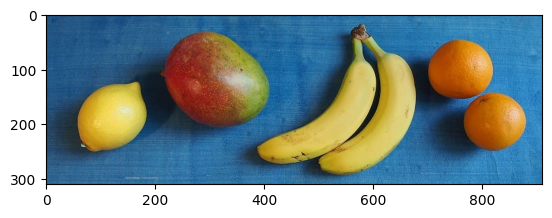

In [15]:
image = plt.imread('fruit2.jpg')
plt.imshow(image)
plt.show()

In [16]:
class ImageSegmentation:
    def __init__(self, num_clusters):
        self.num_clusters = num_clusters
        self.kmeans = KMeans(n_clusters=num_clusters, n_init=10)
        self.seg_image = None
        self.cluster_centers = None
        self.colors = np.zeros((num_clusters, 1, 3), dtype=np.uint8)

    def normalize(image):
        if len(image.shape) == 2:
            return (image - np.min(image)) / (np.max(image) - np.min(image))
        
        elif len(image.shape) == 3:
            new = np.zeros(image.shape, dtype=np.float32)
            for k in range(3):
                new[:, :, k] = (image[:, :, k] - np.min(image[:, :, k])) / (np.max(image[:, :, k]) - np.min(image[:, :, k]))

            return new
    
    def fit(self, image):
        vectorized = np.float32(image.reshape((-1, 3)))
        self.kmeans.fit(vectorized)
        self.seg_image = self.kmeans.predict(vectorized).reshape(image.shape[:2])
        self.cluster_centers = np.array(self.kmeans.cluster_centers_, dtype=np.uint8)
        
        for i in range(self.num_clusters):
            self.colors[i, 0, 0] = self.cluster_centers[i, 0]
            self.colors[i, 0, 1] = self.cluster_centers[i, 1]
            self.colors[i, 0, 2] = self.cluster_centers[i, 2]

    def get_segmented_image(self):
        print(self.num_clusters)
        new_image = np.zeros((self.seg_image.shape[0], self.seg_image.shape[1], 3), dtype=np.uint8)
        for i in range(self.num_clusters):
            new_image[self.seg_image == i, :] = self.colors[i]

        return new_image

7


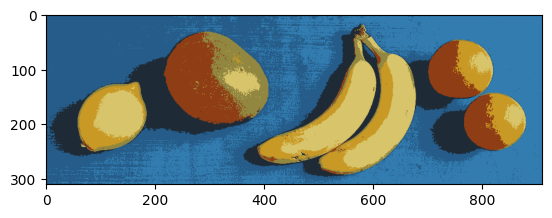

In [22]:
imgseg = ImageSegmentation(num_clusters = 7)
imgseg.fit(image)
seg_img = imgseg.get_segmented_image()
plt.imshow(seg_img)
plt.show()

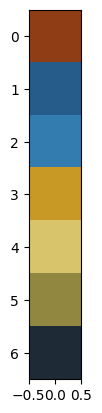

In [23]:
plt.imshow(imgseg.colors)
plt.show()

In [20]:
def get_elbow_plot(image, end=10):
    inertias = []
    times = []
    
    for i in range(1, end+1):
        
        cur_inertia = 0
        cur_time = 0
        imgseg = ImageSegmentation(num_clusters = i)
        
        for j in range(5):
            st = time.time()
            imgseg.fit(image)
            cur_inertia += imgseg.kmeans.inertia_
            cur_time += time.time() - st
        
        inertias.append(cur_inertia / 5)
        times.append(cur_time / 5)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, end+1), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow plot')
    plt.subplot(1, 2, 2)
    plt.plot(range(1, end+1), times, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Time')
    plt.title('Time plot')
    plt.grid()
    plt.show()

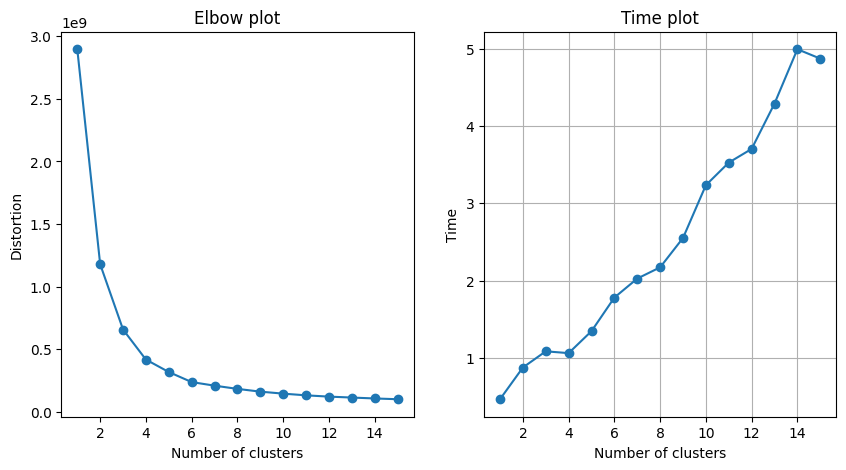

In [21]:
get_elbow_plot(image, end=15)

In [7]:
imgseg.kmeans.cluster_centers_

array([[ 15.205902,  29.212784,   2.936283],
       [241.30374 , 197.57071 ,  13.961443],
       [187.03558 , 207.56647 , 249.22392 ],
       [141.8053  , 109.52546 ,  10.592222],
       [ 52.93887 ,  88.77535 ,  14.192751]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


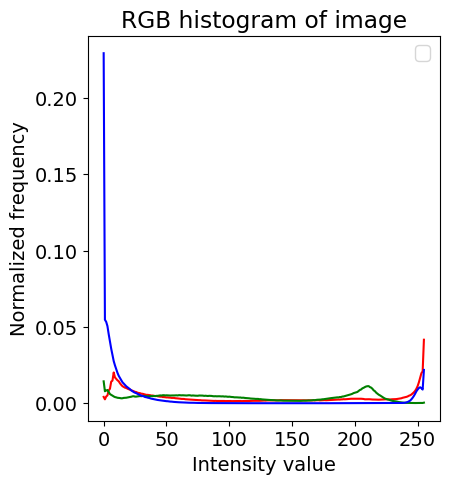

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# img = plt.imread('sunflower.jpg')
img = plt.imread('sunflower.jpg')

# Split the image into its RGB channels
r, g, b = cv2.split(img)

# Set the histogram parameters
bins = 256
range = (0, 256)

# Compute the histograms
hist_r, _ = np.histogram(r.ravel(), bins=bins, range=range)
hist_g, _ = np.histogram(g.ravel(), bins=bins, range=range)
hist_b, _ = np.histogram(b.ravel(), bins=bins, range=range)

# Normalize the histograms
hist_r = hist_r / np.sum(hist_r)
hist_g = hist_g / np.sum(hist_g)
hist_b = hist_b / np.sum(hist_b)

# Set the figure size and font style
fig = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})

# Plot the histograms
plt.subplot(1, 2, 1)
plt.plot(hist_r, color='r')
plt.plot(hist_g, color='g')
plt.plot(hist_b, color='b')

# Add labels and legend
plt.xlabel('Intensity value')
plt.ylabel('Normalized frequency')
plt.title('RGB histogram of image')
plt.legend()

# Show the plot
plt.show()


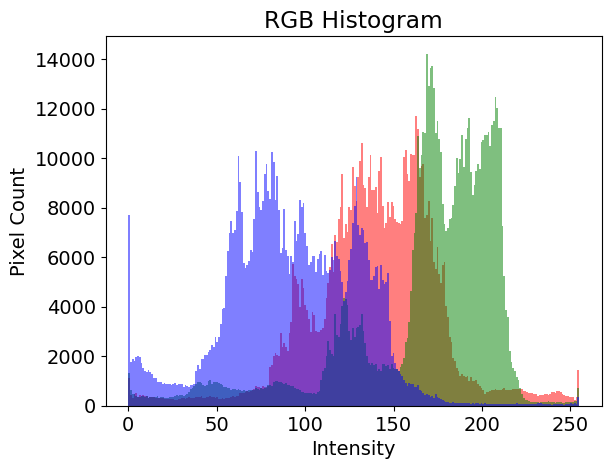

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('bug.jpg')

# Convert the image to RGB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the color channels
r, g, b = cv2.split(img)

# Set up the plot
fig, ax = plt.subplots()

# Plot the histograms for each color channel
ax.hist(r.ravel(), bins=256, color='red', alpha=0.5)
ax.hist(g.ravel(), bins=256, color='green', alpha=0.5)
ax.hist(b.ravel(), bins=256, color='blue', alpha=0.5)

# Set the plot labels and title
ax.set_xlabel('Intensity')
ax.set_ylabel('Pixel Count')
ax.set_title('RGB Histogram')

# Show the plot
plt.show()


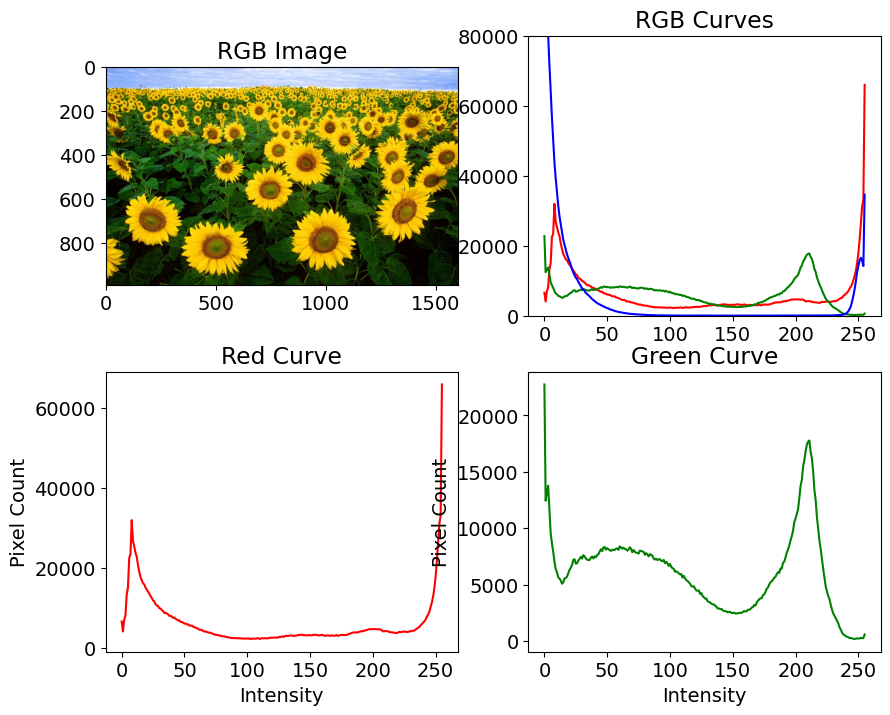

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('sunflower.jpg')

# Convert the image to RGB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the color channels
r, g, b = cv2.split(img)

# Compute the histograms
hist_r, bins_r = np.histogram(r.flatten(), 256, [0, 256])
hist_g, bins_g = np.histogram(g.flatten(), 256, [0, 256])
hist_b, bins_b = np.histogram(b.flatten(), 256, [0, 256])

# Set up the plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the RGB image
ax[0][0].imshow(img)
ax[0][0].set_title('RGB Image')

# Plot the RGB curves
ax[0][1].plot(bins_r[:-1], hist_r, color='red')
ax[0][1].plot(bins_g[:-1], hist_g, color='green')
ax[0][1].plot(bins_b[:-1], hist_b, color='blue')
ax[0][1].set_ylim(0, 80000)
ax[0][1].set_title('RGB Curves')

# Plot the individual channel curves
ax[1][0].plot(bins_r[:-1], hist_r, color='red')
ax[1][0].set_title('Red Curve')
ax[1][1].plot(bins_g[:-1], hist_g, color='green')
ax[1][1].set_title('Green Curve')

# Hide the y-axis labels for the bottom plots
ax[1][0].set_ylabel('Pixel Count')
ax[1][1].set_ylabel('Pixel Count')
ax[1][0].set_xlabel('Intensity')
ax[1][1].set_xlabel('Intensity')

# Show the plot
plt.show()


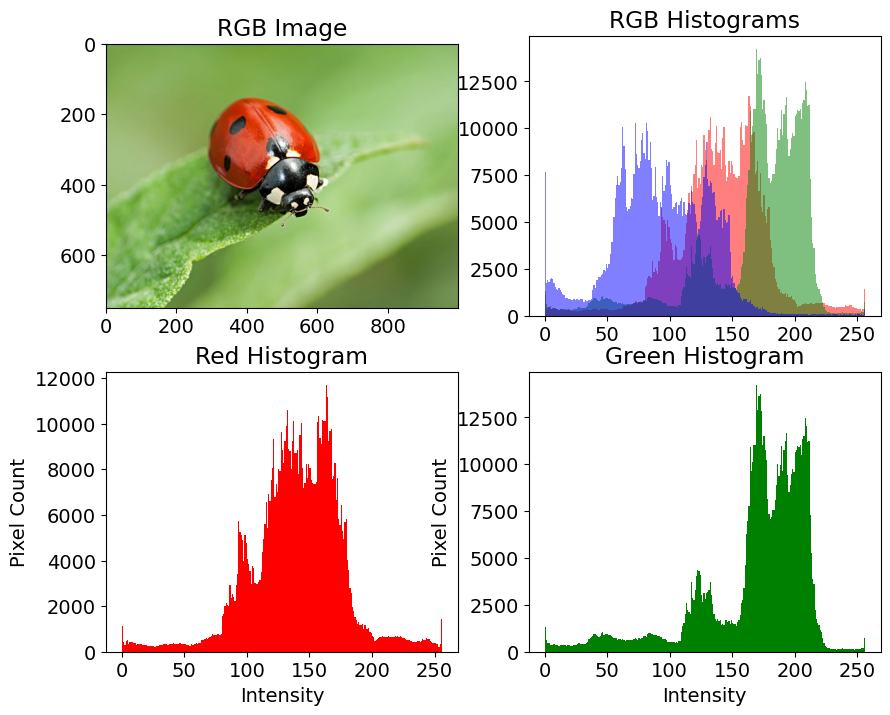

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('bug.jpg')

# Convert the image to RGB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the color channels
r, g, b = cv2.split(img)

# Compute the histograms
hist_r, bins_r = np.histogram(r.flatten(), 256, [0, 256])
hist_g, bins_g = np.histogram(g.flatten(), 256, [0, 256])
hist_b, bins_b = np.histogram(b.flatten(), 256, [0, 256])

# Set up the plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the RGB image
ax[0][0].imshow(img)
ax[0][0].set_title('RGB Image')

# Plot the RGB histograms
ax[0][1].hist(r.flatten(), 256, [0, 256], color='red', alpha=0.5)
ax[0][1].hist(g.flatten(), 256, [0, 256], color='green', alpha=0.5)
ax[0][1].hist(b.flatten(), 256, [0, 256], color='blue', alpha=0.5)
ax[0][1].set_title('RGB Histograms')

# Plot the individual channel histograms
ax[1][0].hist(r.flatten(), 256, [0, 256], color='red')
ax[1][0].set_title('Red Histogram')
ax[1][1].hist(g.flatten(), 256, [0, 256], color='green')
ax[1][1].set_title('Green Histogram')

# Hide the y-axis labels for the bottom plots
ax[1][0].set_ylabel('Pixel Count')
ax[1][1].set_ylabel('Pixel Count')
ax[1][0].set_xlabel('Intensity')
ax[1][1].set_xlabel('Intensity')

# Show the plot
plt.show()


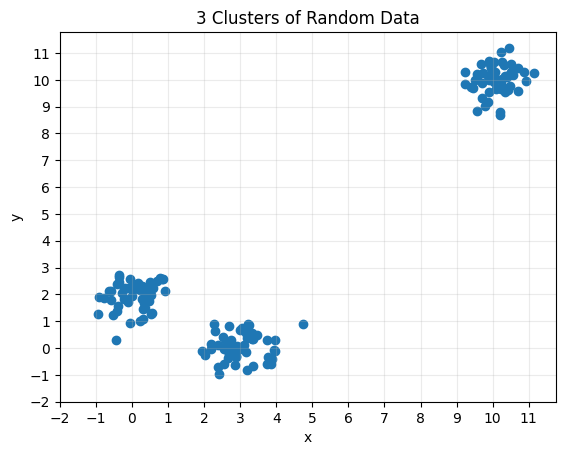

(150, 2)


In [48]:
# Generate 3 clusters of random data
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.normal(0, 0.5, 50)
y1 = np.random.normal(2, 0.5, 50)
x2 = np.random.normal(3, 0.5, 50)
y2 = np.random.normal(0, 0.5, 50)
x3 = np.random.normal(10, 0.5, 50)
y3 = np.random.normal(10, 0.5, 50)

# Plot the data
plt.scatter(x1, y1, c='#1f77b4')
plt.scatter(x2, y2, c='#1f77b4')
plt.scatter(x3, y3, c='#1f77b4')
plt.xticks(np.arange(-2, 12, 1))
plt.yticks(np.arange(-2, 12, 1))
plt.grid(alpha=0.25)
plt.xlabel('x')
plt.ylabel('y')
plt.title('3 Clusters of Random Data')

# Show the plot
plt.show()

# concat all X
X = np.concatenate((x1, x2, x3))
Y = np.concatenate((y1, y2, y3))
data = np.vstack((X, Y)).T
print(data.shape)

(150, 2)
(150, 2)


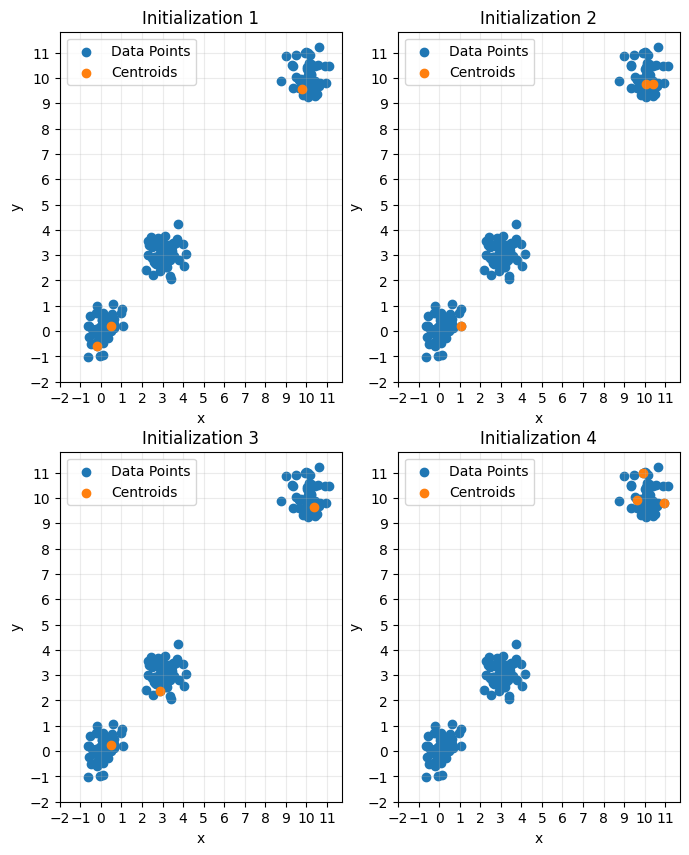

In [82]:
# Generate 3 clusters of random data
import numpy as np
import matplotlib.pyplot as plt
x1 = np.random.normal(0, 0.5, 50)
y1 = np.random.normal(0, 0.5, 50)
x2 = np.random.normal(3, 0.5, 50)
y2 = np.random.normal(3, 0.5, 50)
x3 = np.random.normal(10, 0.5, 50)
y3 = np.random.normal(10, 0.5, 50)

# # Plot the data
# plt.scatter(x1, y1, c='#1f77b4')
# plt.scatter(x2, y2, c='#1f77b4')
# plt.scatter(x3, y3, c='#1f77b4')
# plt.xticks(np.arange(-2, 12, 1))
# plt.yticks(np.arange(-2, 12, 1))
# plt.grid(alpha=0.25)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('3 Clusters of Random Data')

# # Show the plot
# plt.show()

# concat all X
X = np.concatenate((x1, x2, x3))
Y = np.concatenate((y1, y2, y3))
data = np.vstack((X, Y)).T
print(data.shape)

def choose_random_centroid(data, k):
    # Initialize centroids as empty list
    centroids = []
    # Randomly select k data points to be centroids
    choices = np.random.choice(data.shape[0], k, replace=False)
    # Loop through the choices
    for choice in choices:
        # Append the centroids
        centroids.append(data[choice])
    # Return the centroids
    return centroids

print(data.shape)

plt.subplots(nrows=2, ncols=2, figsize=(8, 10))
for i in range(4):
    # Generate the centroids
    centroids = choose_random_centroid(data, 3)
    # Plot the data
    plt.subplot(2, 2, i+1)
    plt.scatter(x1, y1, c='#1f77b4', label='Data Points')
    plt.scatter(x2, y2, c='#1f77b4')
    plt.scatter(x3, y3, c='#1f77b4')
    # Plot the centroids
    plt.scatter(centroids[0][0], centroids[0][1], c='#ff7f0e', label='Centroids')
    plt.scatter(centroids[1][0], centroids[1][1], c='#ff7f0e')
    plt.scatter(centroids[2][0], centroids[2][1], c='#ff7f0e')
    plt.title('Initialization {}'.format(i+1))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xticks(np.arange(-2, 12, 1))
    plt.yticks(np.arange(-2, 12, 1))
    plt.grid(alpha=0.25)
# Show the plot
plt.show()


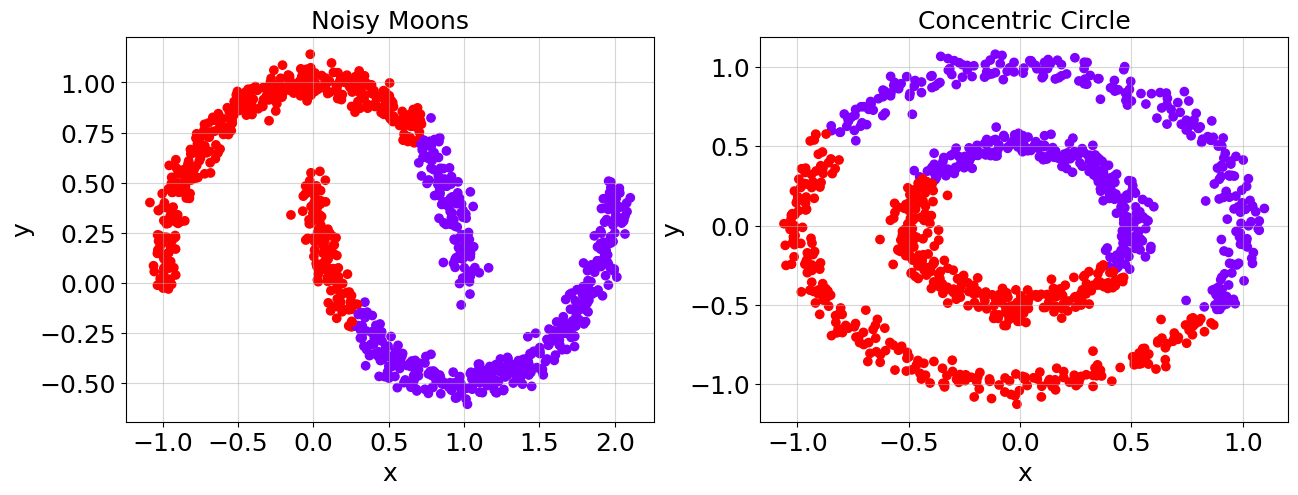

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
noise_moon_samples = make_moons(n_samples=1000, noise=0.05)[0]
circle_samples = make_circles(n_samples=1000, factor=0.5, noise=0.05)[0]
# apply kmeans to the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(noise_moon_samples)
# plot the data
plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(noise_moon_samples[:, 0], noise_moon_samples[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('Noisy Moons', fontsize=18)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.legend()
plt.grid(alpha=0.5)
# plt.show()

# apply kmeans to the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(circle_samples)
# plot the data
plt.subplot(1, 2, 2)
plt.scatter(circle_samples[:, 0], circle_samples[:, 1], c=kmeans.labels_, cmap='rainbow', label='Data Points')
plt.title('Concentric Circle', fontsize=18)
plt.xlabel('x', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(alpha=0.5)
plt.show()

